In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import datetime

import numpyro
from numpyro.diagnostics import hpdi
import jax.numpy as jnp

import matplotlib.pyplot as plt

# add mecha-fil path here, because it is different than the module's relative path
import sys
sys.path.append('../../filecoin-mecha-twin')

import scenario_generator.mcmc_forecast as mcmc

In [2]:
numpyro.set_host_device_count(2)

today = datetime.datetime.now().date()
DATA_LAG_DAYS = 10
train_len_days = 180
# # --> enable this after you sort out what is going on w/ the data
train_start_date = today - datetime.timedelta(days=(DATA_LAG_DAYS + train_len_days))
train_end_date = train_start_date + datetime.timedelta(days=train_len_days)

# train_end_date = datetime.date(2022, 11, 1)
# train_start_date = train_end_date - datetime.timedelta(days=train_len_days)

print(train_start_date, train_end_date)

2022-05-23 2022-11-19


In [3]:
num_warmup_mcmc = 500
num_samples_mcmc = 100
seasonality_mcmc = 1000
num_chains_mcmc = 2

forecast_length = 365*2

In [4]:
forecast_date_vec, rb_onboard_power_pred, x_train, y_train = \
    mcmc.forecast_rb_onboard_power(train_start_date, 
                                   train_end_date,
                                   forecast_length,
                                   num_warmup_mcmc = num_warmup_mcmc,
                                   num_samples_mcmc = num_samples_mcmc,
                                   seasonality_mcmc = seasonality_mcmc,
                                   num_chains_mcmc = num_chains_mcmc)

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]


                      mean       std    median      5.0%     95.0%     n_eff     r_hat
      coef_trend     -0.08      0.09     -0.05     -0.22      0.01     57.90      1.01
       init_s[0]      3.37     30.99      0.04    -30.29     22.79    208.30      1.00
       init_s[1]     -1.38      1.05     -1.55     -2.50      0.06    135.14      0.99
       init_s[2]     -1.43      0.87     -1.49     -2.66     -0.25    173.58      0.99
       init_s[3]     -0.59      1.16     -0.69     -2.88      0.88    142.08      1.00
       init_s[4]     -0.17      1.01     -0.19     -1.66      1.49    159.68      1.00
       init_s[5]      0.10      0.98      0.06     -1.50      1.54    108.73      1.01
       init_s[6]     -0.44      1.20     -0.65     -2.15      1.23    107.57      1.01
       init_s[7]      0.16      1.05      0.12     -1.37      1.94     98.61      1.01
       init_s[8]     -0.17      1.23     -0.14     -2.10      1.64    119.61      1.00
       init_s[9]      0.70      1.29      

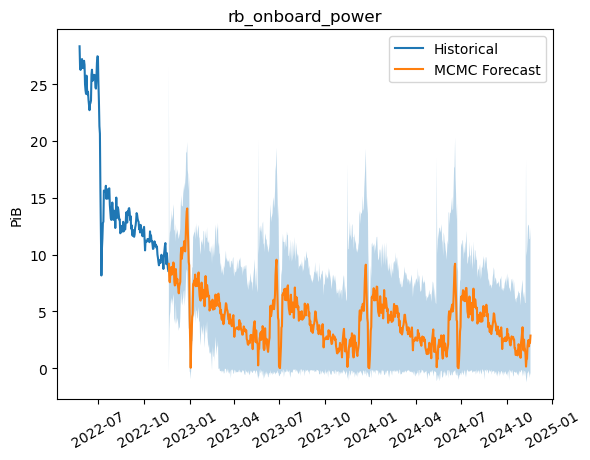

In [5]:
plt.figure()
y_pred_rb_onboard_power = jnp.median(rb_onboard_power_pred, axis=0)
hpd_low, hpd_high = hpdi(rb_onboard_power_pred)
plt.plot(x_train, y_train, label='Historical')
plt.plot(forecast_date_vec, y_pred_rb_onboard_power, label='MCMC Forecast')
plt.fill_between(forecast_date_vec, hpd_low, hpd_high, alpha=0.3)
plt.title('rb_onboard_power')
plt.ylabel('PiB')
plt.xticks(rotation=30)
plt.legend()

In [6]:
forecast_date_vec, renewal_rate_pred, x_train, y_train = \
    mcmc.forecast_renewal_rate(train_start_date, 
                               train_end_date,
                               forecast_length,
                               num_warmup_mcmc = num_warmup_mcmc,
                               num_samples_mcmc = num_samples_mcmc,
                               seasonality_mcmc = seasonality_mcmc,
                               num_chains_mcmc = num_chains_mcmc)

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]


                      mean       std    median      5.0%     95.0%     n_eff     r_hat
      coef_trend      0.49      0.40      0.37      0.02      1.04     56.03      1.06
       init_s[0]     -0.18     11.10     -0.16    -17.91     10.13     39.57      1.05
       init_s[1]     -0.83      0.88     -0.79     -1.97      0.86    110.79      0.99
       init_s[2]     -0.50      0.94     -0.52     -2.11      0.78     79.70      1.00
       init_s[3]     -0.44      0.97     -0.46     -1.94      1.21     87.00      1.01
       init_s[4]      2.38      0.89      2.33      1.10      3.69     64.14      1.02
       init_s[5]      5.78      1.02      5.72      4.49      7.78     89.35      1.01
       init_s[6]     27.84      1.22     27.84     26.24     30.16     52.08      1.02
       init_s[7]     -0.96      1.16     -0.92     -2.54      1.27     14.14      1.07
       init_s[8]      0.20      1.12      0.26     -1.56      1.87     33.09      1.05
       init_s[9]      7.98      1.09      

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]


                      mean       std    median      5.0%     95.0%     n_eff     r_hat
      coef_trend      0.18      0.14      0.14      0.00      0.39     60.63      1.03
       init_s[0]      1.93     11.68      0.34    -10.74     12.75    138.90      1.00
       init_s[1]     -0.35      0.48     -0.39     -1.08      0.43    209.26      0.99
       init_s[2]      0.26      0.61      0.27     -0.73      1.28    173.03      1.01
       init_s[3]     -1.67      0.66     -1.75     -2.82     -0.64    255.22      1.00
       init_s[4]      1.33      0.67      1.31      0.34      2.60    231.77      1.01
       init_s[5]     -1.22      0.65     -1.28     -2.13      0.01    132.06      1.02
       init_s[6]     13.18      0.71     13.16     12.24     14.51    115.63      1.04
       init_s[7]     -1.93      0.73     -1.95     -3.30     -0.86    161.02      1.01
       init_s[8]     -0.56      0.63     -0.55     -1.71      0.32    134.55      1.02
       init_s[9]     20.31      0.75     2

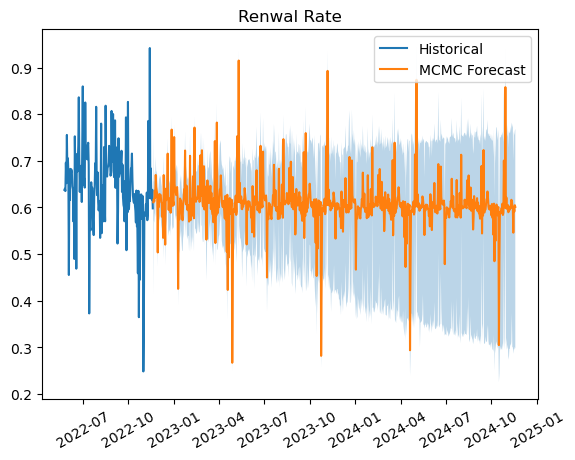

In [7]:
plt.figure()
y_pred_renewal_rate = jnp.median(renewal_rate_pred, axis=0)
hpd_low, hpd_high = hpdi(renewal_rate_pred)
plt.plot(x_train, y_train, label='Historical')
plt.plot(forecast_date_vec, y_pred_renewal_rate, label='MCMC Forecast')
plt.fill_between(forecast_date_vec, hpd_low, hpd_high, alpha=0.3)
plt.title('Renwal Rate')
plt.xticks(rotation=30)
plt.legend()

In [36]:
train_end_date = datetime.date(2022, 11, 1)
train_start_date = train_end_date - datetime.timedelta(days=train_len_days)

num_warmup_mcmc = 500
num_samples_mcmc = 100
seasonality_mcmc = 1000
num_chains_mcmc = 2

forecast_date_vec, filplus_rate_pred, x_train, y_train = \
    mcmc.forecast_filplus_rate(train_start_date, 
                               train_end_date,
                               forecast_length,
                               num_warmup_mcmc = num_warmup_mcmc,
                               num_samples_mcmc = num_samples_mcmc,
                               seasonality_mcmc = seasonality_mcmc,
                               num_chains_mcmc = num_chains_mcmc)

2022-05-05 2022-11-01


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]


                      mean       std    median      5.0%     95.0%     n_eff     r_hat
      coef_trend      0.46      0.46      0.44     -0.00      0.94      1.01     24.72
       init_s[0]      0.92      0.93      1.02     -0.08      2.10      1.02      8.27
       init_s[1]      0.04      0.12      0.05     -0.20      0.21      4.70      1.19
       init_s[2]     -0.04      0.09     -0.02     -0.22      0.08     18.22      1.11
       init_s[3]     -0.05      0.12     -0.03     -0.25      0.14      4.11      1.16
       init_s[4]     -0.16      0.29     -0.05     -0.76      0.15      1.76      1.76
       init_s[5]     -1.02      0.86     -1.26     -1.93     -0.01      1.02      6.92
       init_s[6]     -0.23      0.25     -0.15     -0.66      0.09      3.07      1.87
       init_s[7]      0.76      0.55      0.86     -0.01      1.38      1.07      3.88
       init_s[8]      0.64      0.54      0.75      0.00      1.35      1.04      5.48
       init_s[9]     -0.02      0.13     -

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]


                      mean       std    median      5.0%     95.0%     n_eff     r_hat
      coef_trend     -0.11      0.10     -0.08     -0.27     -0.01     49.55      1.02
       init_s[0]     -1.27     18.03     -0.18    -24.18     27.87    125.68      1.00
       init_s[1]      1.58      0.45      1.58      0.91      2.38    122.35      1.00
       init_s[2]      1.83      0.62      1.81      0.88      2.80     81.74      1.00
       init_s[3]      1.60      0.66      1.64      0.54      2.54    124.73      1.00
       init_s[4]      0.74      0.70      0.86     -0.55      1.70    132.66      1.00
       init_s[5]      2.31      0.72      2.28      1.08      3.44     90.06      1.02
       init_s[6]      1.81      0.80      1.81      0.61      3.17     85.36      1.01
       init_s[7]      0.40      0.88      0.50     -1.02      1.72     47.14      1.03
       init_s[8]      0.33      0.90      0.39     -1.13      1.82     54.73      1.02
       init_s[9]     -1.05      1.00     -

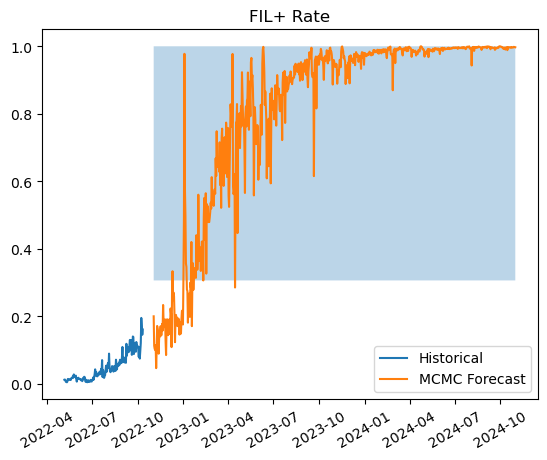

In [38]:
plt.figure()
y_pred_filplus = jnp.median(filplus_rate_pred, axis=0)
hpd_low, hpd_high = hpdi(y_pred_filplus)
plt.plot(x_train, y_train, label='Historical')
plt.plot(forecast_date_vec, y_pred_filplus, label='MCMC Forecast')
plt.fill_between(forecast_date_vec, hpd_low, hpd_high, alpha=0.3)
plt.title('FIL+ Rate')
plt.xticks(rotation=30)
plt.legend()